## マルチクラス分析

### 1.Irisデータ

In [2]:
#萼（がく、へた）
#萼片の長さと幅
#幅の長さと幅

In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline


In [4]:
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [6]:
#説明変数
X=iris.data

In [7]:
#目的変数
Y=iris.target

In [8]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [9]:
X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [10]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
iris_data=DataFrame(X, columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

In [12]:
iris_target =DataFrame(Y, columns=['Species'])

In [13]:
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num ==1:
        return 'Veriscolour'
    else:
        return 'Virginica'

In [14]:
iris_target['Species']=iris_target['Species'].apply(flower)

In [15]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [16]:
iris =pd.concat([iris_data,iris_target],axis=1)

In [17]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


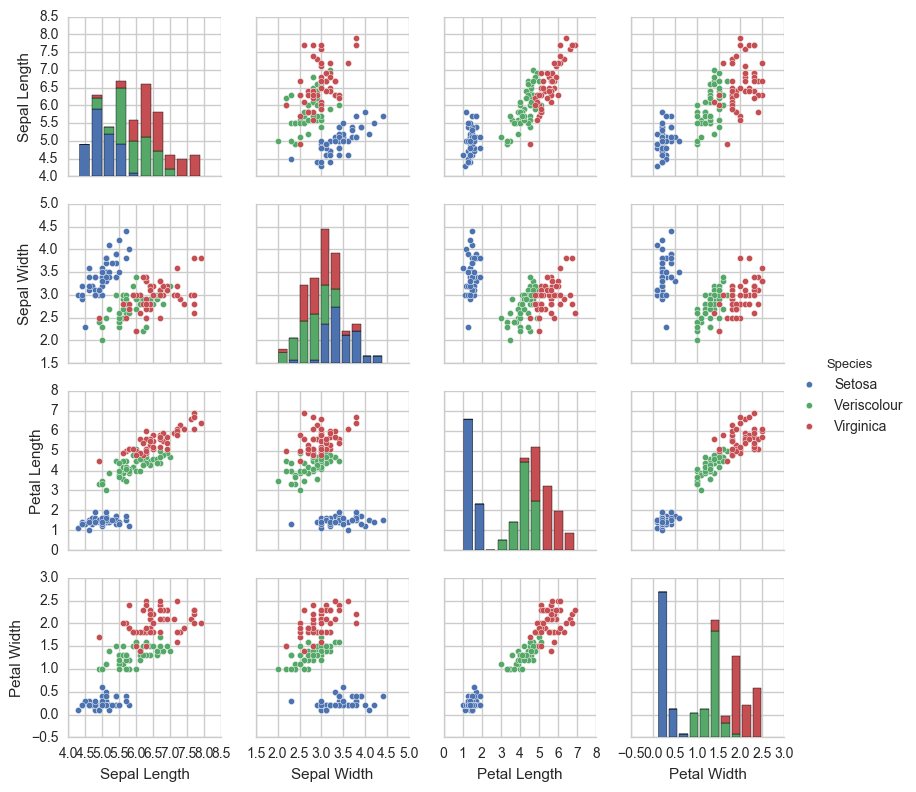

In [19]:
sns.pairplot(iris,hue='Species',size=2)

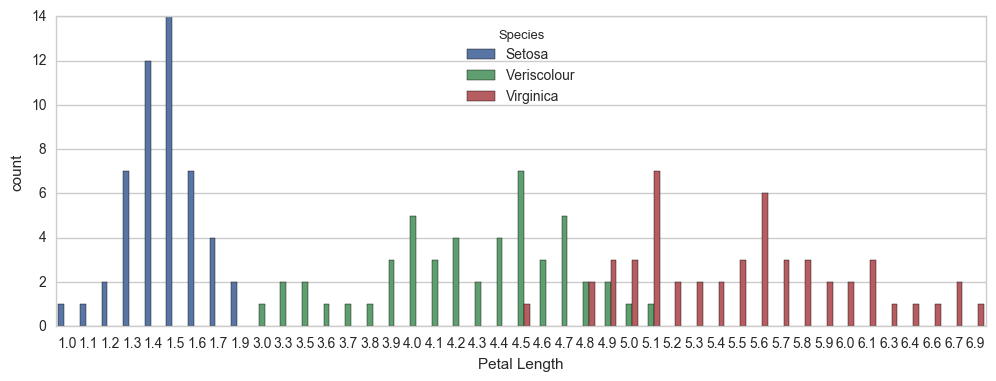

In [20]:
#花びらの長さ
plt.figure(figsize=(12,4))
sns.countplot('Petal Length',data=iris,hue='Species')

## 2.機械学習

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
from sklearn.cross_validation import train_test_split

In [24]:
logreg =LogisticRegression()

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=3)

In [26]:
#make model
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
from sklearn import metrics

In [28]:
Y_pred =logreg.predict(X_test)

In [29]:
Y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0, 2, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1])

In [30]:
metrics.accuracy_score(Y_test,Y_pred)

#93%は予測できている

0.93333333333333335

## 3. K近傍法

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors=6)

In [34]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [35]:
Y_pred =knn.predict(X_test)

In [36]:
metrics.accuracy_score(Y_test,Y_pred)

0.94999999999999996

In [37]:
knn = KNeighborsClassifier(n_neighbors=1)

In [38]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [39]:
Y_pred =knn.predict(X_test)

In [40]:
metrics.accuracy_score(Y_test,Y_pred)

0.96666666666666667

In [54]:
#kを変化させるとどうなるのか
k_range=range(1,90)
accuracy=[]

In [55]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

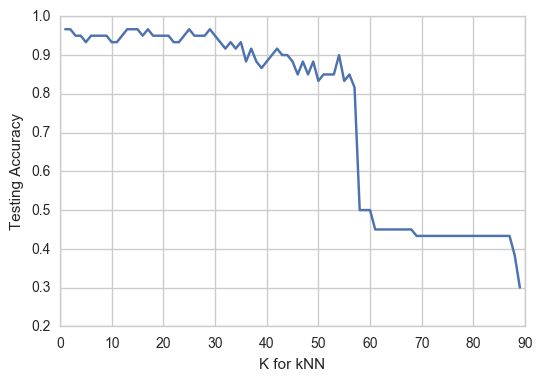

In [57]:
#k=30から下がり気味かな
plt.plot(k_range, accuracy)
plt.xlabel('K for kNN')
plt.ylabel('Testing Accuracy')